# PRCP-1016-HeartDieseasePred

Author - Sreekanth P, Date: 04-09-2025

# Abstract

●	Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

●	People with cardiovascular diseaseor who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.


Domain: Healthcare

# Content

1.	There are 14 columns in the dataset, where the patient_id column is a unique and random identifier. The remaining 13 features are described in the section below.
2.	slope_of_peak_exercise_st_segment (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart
3.  thal (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect
4.	resting_blood_pressure (type: int): resting blood pressure
5.	chest_pain_type (type: int): chest pain type (4 values)
6.	num_major_vessels (type: int): number of major vessels (0-3) colored by flourosopy
7.	fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar > 120 mg/dl
8.	resting_ekg_results (type: int): resting electrocardiographic results (values 0,1,2)
9.	serum_cholesterol_mg_per_dl (type: int): serum cholestoral in mg/dl
10.	oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms
11. sex (type: binary): 0: female, 1: male
12.	age (type: int): age in years
13.	max_heart_rate_achieved (type: int): maximum heart rate achieved (beats per minute)
14.	exercise_induced_angina (type: binary): exercise-induced chest pain (0: False, 1: True)


# Import Libraries & Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_csv('labels.csv')

In [3]:
data2 = pd.read_csv('Values.csv')

In [4]:
data1

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


In [5]:
data2

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [6]:
data1_final = data1.drop('patient_id',axis=1)

In [7]:
data1_final

,heart_disease_present
0,0
1,0
2,1
3,1
4,0
...,...
175,1
176,1
177,1
178,0


In [8]:
data2_final=data2.drop('patient_id',axis=1)

In [9]:
data2_final

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [10]:
data = pd.concat([data1_final,data2_final],axis=1)

In [11]:
data

,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,0,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,1,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,1,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,0,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,1,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,1,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


# Basic Checks

In [12]:
data

,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,0,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,1,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,1,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,0,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,1,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,1,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [13]:
data.head()

,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,0,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,1,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,1,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,0,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [14]:
data.tail()

,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
175,1,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,1,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,1,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0,1,normal,124,3,2,1,0,255,0.0,1,48,175,0
179,0,1,normal,160,3,1,0,0,201,0.0,0,54,163,0


In [15]:
data.shape

(180, 14)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   heart_disease_present                 180 non-null    int64  
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [17]:
data.describe()

,heart_disease_present,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.444444,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.498290,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,0.000000,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,0.000000,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,0.000000,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,1.000000,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,1.000000,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


In [18]:
data.isnull().sum()

heart_disease_present                   0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64

In [19]:
data.columns

Index(['heart_disease_present', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina'],
      dtype='object')

# Data Preprocessing

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
data["thal"]=LabelEncoder().fit_transform(data["thal"])

In [22]:
data["thal"]

0      1
1      1
2      1
3      2
4      2
      ..
175    2
176    1
177    2
178    1
179    1
Name: thal, Length: 180, dtype: int32

Checking for outliers

In [1]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outlier_mask = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
print("Outliers detected per column:\n", outlier_mask.sum())

NameError: name 'data' is not defined

# Exporatory Data Analysis

## Univariate Analysis

In [23]:
import matplotlib.pyplot as plt

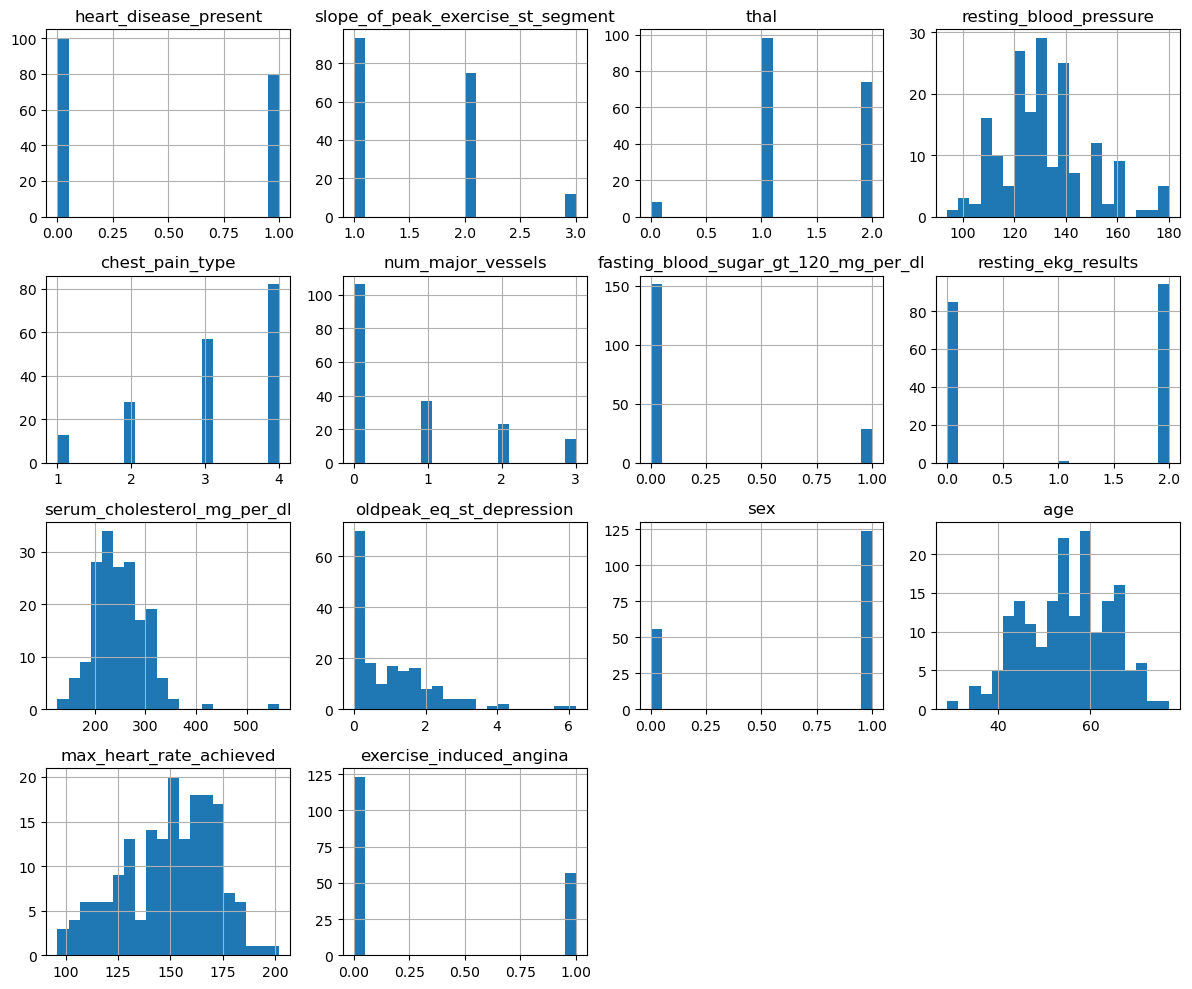

In [24]:
data.hist(bins=20, figsize=(12,10))
plt.tight_layout()

## Bivariate Analysis

In [25]:
import seaborn as sns

In [26]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [27]:
data2_final["thal"]=LabelEncoder().fit_transform(data2_final["thal"])

In [28]:
correlation = data.corr()

<Axes: >

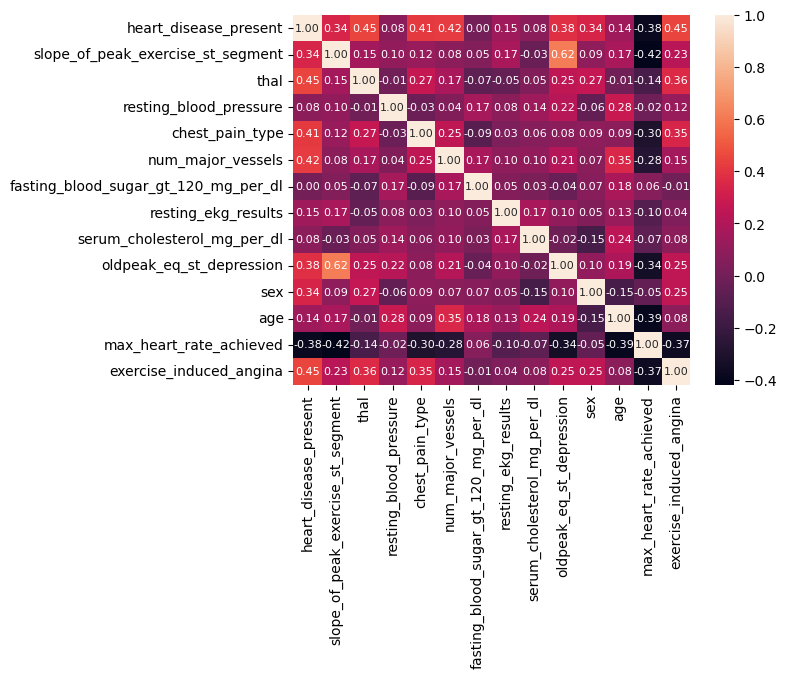

In [29]:
sns.heatmap(correlation, annot=True, fmt=".2f", annot_kws={"size":8})

### Test Train Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = data2_final
y = data1_final

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=45)

### Scaling

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeling

## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=2000,class_weight='balanced')
lr.fit(X_train_scaled,y_train)

LogisticRegression(class_weight='balanced', max_iter=2000)

### Prediction

In [36]:
y_pred=lr.predict(X_test_scaled)

In [37]:
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [38]:
y_pred_prob=lr.predict_proba(X_test_scaled)

In [39]:
y_pred_prob

array([[0.74027223, 0.25972777],
       [0.92613266, 0.07386734],
       [0.88796348, 0.11203652],
       [0.45532489, 0.54467511],
       [0.89001885, 0.10998115],
       [0.43297457, 0.56702543],
       [0.93011472, 0.06988528],
       [0.76016953, 0.23983047],
       [0.91979002, 0.08020998],
       [0.64856209, 0.35143791],
       [0.05282388, 0.94717612],
       [0.94611981, 0.05388019],
       [0.88075968, 0.11924032],
       [0.95397411, 0.04602589],
       [0.41069189, 0.58930811],
       [0.7906968 , 0.2093032 ],
       [0.87986973, 0.12013027],
       [0.96494411, 0.03505589],
       [0.00442413, 0.99557587],
       [0.78373092, 0.21626908],
       [0.1514986 , 0.8485014 ],
       [0.9548121 , 0.0451879 ],
       [0.06420485, 0.93579515],
       [0.17853445, 0.82146555],
       [0.42437431, 0.57562569],
       [0.59449183, 0.40550817],
       [0.51345693, 0.48654307],
       [0.00971276, 0.99028724],
       [0.95278776, 0.04721224],
       [0.94821549, 0.05178451],
       [0.

In [40]:
data.heart_disease_present.value_counts()

heart_disease_present
0    100
1     80
Name: count, dtype: int64

### Evaluation of Model

In [136]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score, precision_score,classification_report,f1_score, roc_auc_score

In [42]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8055555555555556

In [43]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[21  3]
 [ 4  8]]


In [44]:
recall=recall_score(y_test,y_pred)
recall

0.6666666666666666

In [45]:
precision=precision_score(y_test,y_pred)
precision

0.7272727272727273

In [46]:
f1score=f1_score(y_test,y_pred)
f1score

0.6956521739130435

In [137]:
lr_rocauc=roc_auc_score(y_test,y_pred)
lr_rocauc

0.7708333333333333

In [47]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        24
           1       0.73      0.67      0.70        12

    accuracy                           0.81        36
   macro avg       0.78      0.77      0.78        36
weighted avg       0.80      0.81      0.80        36



In [138]:
metrics_lr = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1score,'ROC-AUC' : lr_rocauc}

In [139]:
metrics_lr

{'accuracy': 0.8055555555555556,
 'precision': 0.7272727272727273,
 'recall': 0.6666666666666666,
 'f1': 0.6956521739130435,
 'ROC-AUC': 0.7708333333333333}

## Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [51]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=5)]      # List Comprehension-using for loop in list
max_features = ['auto', 'sqrt','log2']        # maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=5)]            # List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [5, 10]          # minimum number of samples required to split an internal node
min_samples_leaf = [2, 4]

In [52]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [53]:
rf_clf1 = RandomForestClassifier(random_state=42)   # Loading the model

rf_cv = GridSearchCV(estimator=rf_clf1, scoring='f1',param_grid= random_grid, cv=3,
                               verbose=2, n_jobs=-1)

In [54]:
sample_weights = np.ones(len(y_train)) 

In [55]:
sample_weights

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

In [56]:
rf_cv.fit(X_train, y_train,sample_weight=sample_weights)      # training data on randomsearch cv
rf_best_params = rf_cv.best_params_       # it will give you best parameters
print(f"Best paramters: {rf_best_params})") 

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
Best paramters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200})


In [57]:
rf = RandomForestClassifier(n_estimators=200,min_samples_leaf=2,min_samples_split=10,max_features="sqrt",max_depth=10)

In [58]:
rf.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200)

In [59]:
rf_y_pred=rf.predict(X_test_scaled)

In [60]:
rf_y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [61]:
rf_y_pred_prob=rf.predict_proba(X_test_scaled)

In [62]:
rf_y_pred_prob

array([[0.67093519, 0.32906481],
       [0.82713382, 0.17286618],
       [0.6784337 , 0.3215663 ],
       [0.62838661, 0.37161339],
       [0.6327989 , 0.3672011 ],
       [0.5315645 , 0.4684355 ],
       [0.86772702, 0.13227298],
       [0.56070947, 0.43929053],
       [0.7400323 , 0.2599677 ],
       [0.48850593, 0.51149407],
       [0.22050206, 0.77949794],
       [0.92111254, 0.07888746],
       [0.85191105, 0.14808895],
       [0.91671629, 0.08328371],
       [0.46267433, 0.53732567],
       [0.60889669, 0.39110331],
       [0.71572178, 0.28427822],
       [0.74219976, 0.25780024],
       [0.05280712, 0.94719288],
       [0.74015162, 0.25984838],
       [0.42704064, 0.57295936],
       [0.7402845 , 0.2597155 ],
       [0.38065439, 0.61934561],
       [0.29476059, 0.70523941],
       [0.79196433, 0.20803567],
       [0.53229214, 0.46770786],
       [0.52531291, 0.47468709],
       [0.06116078, 0.93883922],
       [0.87012114, 0.12987886],
       [0.86884302, 0.13115698],
       [0.

### Evaluation of model

In [63]:
rf_accuracy=accuracy_score(y_test,rf_y_pred)
rf_accuracy

0.8055555555555556

In [64]:
rf_cm=confusion_matrix(y_test,rf_y_pred)
print(rf_cm)

[[22  2]
 [ 5  7]]


In [65]:
rf_recall=recall_score(y_test,rf_y_pred)
rf_recall

0.5833333333333334

In [66]:
rf_precision=precision_score(y_test,rf_y_pred)
rf_precision

0.7777777777777778

In [67]:
rf_f1score=f1_score(y_test,rf_y_pred)
rf_f1score

0.6666666666666666

In [68]:
rf_cr=classification_report(y_test,rf_y_pred)
print(rf_cr)

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        24
           1       0.78      0.58      0.67        12

    accuracy                           0.81        36
   macro avg       0.80      0.75      0.76        36
weighted avg       0.80      0.81      0.80        36



In [141]:
rf_rocauc=roc_auc_score(y_test,rf_y_pred)
rf_rocauc

0.7500000000000001

In [142]:
metrics_rf = {'accuracy': rf_accuracy, 'precision': rf_precision, 'recall': rf_recall, 'f1': rf_f1score,'ROC-AUC' : rf_rocauc}

## KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
knn=KNeighborsClassifier(n_neighbors=8)

In [72]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=8)

In [73]:
knn_y_pred=knn.predict(X_test_scaled)

In [74]:
knn_y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [75]:
knn_y_pred_prob=knn.predict_proba(X_test_scaled)

In [76]:
knn_y_pred_prob

array([[0.75 , 0.25 ],
       [1.   , 0.   ],
       [0.75 , 0.25 ],
       [0.75 , 0.25 ],
       [0.75 , 0.25 ],
       [0.5  , 0.5  ],
       [1.   , 0.   ],
       [0.875, 0.125],
       [0.875, 0.125],
       [0.5  , 0.5  ],
       [0.25 , 0.75 ],
       [0.875, 0.125],
       [0.875, 0.125],
       [1.   , 0.   ],
       [0.375, 0.625],
       [0.875, 0.125],
       [0.75 , 0.25 ],
       [0.875, 0.125],
       [0.   , 1.   ],
       [0.625, 0.375],
       [0.125, 0.875],
       [0.875, 0.125],
       [0.   , 1.   ],
       [0.25 , 0.75 ],
       [0.5  , 0.5  ],
       [0.5  , 0.5  ],
       [0.375, 0.625],
       [0.   , 1.   ],
       [0.875, 0.125],
       [0.875, 0.125],
       [0.875, 0.125],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [0.75 , 0.25 ],
       [0.75 , 0.25 ]])

## Evaluation of model

In [77]:
knn_accuracy=accuracy_score(y_test,knn_y_pred)
knn_accuracy

0.8611111111111112

In [78]:
knn_cm=confusion_matrix(y_test,knn_y_pred)
print(knn_cm)

[[23  1]
 [ 4  8]]


In [79]:
knn_recall=recall_score(y_test,knn_y_pred)
knn_recall

0.6666666666666666

In [80]:
knn_precision=precision_score(y_test,knn_y_pred)
knn_precision

0.8888888888888888

In [81]:
knn_f1score=f1_score(y_test,knn_y_pred)
knn_f1score

0.7619047619047619

In [143]:
knn_rocauc=roc_auc_score(y_test,knn_y_pred)
knn_rocauc

0.8124999999999999

In [82]:
knn_cr=classification_report(y_test,knn_y_pred)
print(knn_cr)

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        24
           1       0.89      0.67      0.76        12

    accuracy                           0.86        36
   macro avg       0.87      0.81      0.83        36
weighted avg       0.86      0.86      0.86        36



In [144]:
metrics_knn = {'accuracy': knn_accuracy, 'precision': knn_precision, 'recall': knn_recall, 'f1': knn_f1score, 'ROC-AUC' : knn_rocauc}

## SVM

In [84]:
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

In [85]:
smote=SMOTE()

In [86]:
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)

In [87]:
from itertools import product  # Importing the product function from itertools module

param_grid_linear = {           #  Define Parameter grid for linear kernel SVM
    'C': [0.1, 5, 10,50,60,70],
    'kernel': ['linear'],
    'gamma': ['scale', 'auto']
}
param_grid_rbf = {              # Define Parameter grid for Radial Basic Function-RBF
    'C': [0.1, 5, 10,50,60,70],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}
param_grid_poly = {             # Define Parameters grid for Polynomial kernel
    'C': [0.1, 10,50],
    'kernel': ['poly'],
    'gamma': ['scale'],
    'degree': [2, 3]
}

In [88]:
svm_model=SVC()

In [89]:
grid = GridSearchCV(svm_model,param_grid=param_grid_poly, refit = True, verbose = 2,scoring='f1',cv=5, n_jobs=-1)

In [90]:
grid.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 10, 50], 'degree': [2, 3],
                         'gamma': ['scale'], 'kernel': ['poly']},
             scoring='f1', verbose=2)

In [91]:
print(grid.best_params_)

{'C': 50, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}


In [92]:
svm_model = SVC(C=50, degree=3, gamma='scale', kernel='poly')

In [93]:
svm_model.fit(X_train_scaled, y_train)

SVC(C=50, kernel='poly')

In [94]:
svm_y_pred=svm_model.predict(X_test_scaled)

In [95]:
svm_y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

### Evaluation of model

In [96]:
svm_accuracy=accuracy_score(y_test,svm_y_pred)
svm_accuracy

0.7222222222222222

In [97]:
svm_cm=confusion_matrix(y_test,svm_y_pred)
print(svm_cm)

[[20  4]
 [ 6  6]]


In [98]:
svm_recall=recall_score(y_test,svm_y_pred)
svm_recall

0.5

In [99]:
svm_precision=precision_score(y_test,svm_y_pred)
svm_precision

0.6

In [100]:
svm_f1score=f1_score(y_test,svm_y_pred)
svm_f1score

0.5454545454545454

In [145]:
svm_rocauc=roc_auc_score(y_test,svm_y_pred)
svm_rocauc

0.6666666666666666

In [101]:
svm_cr=classification_report(y_test,svm_y_pred)
print(svm_cr)

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.60      0.50      0.55        12

    accuracy                           0.72        36
   macro avg       0.68      0.67      0.67        36
weighted avg       0.71      0.72      0.72        36



In [147]:
metrics_svm = {'accuracy': svm_accuracy, 'precision': svm_precision, 'recall': svm_recall, 'f1': svm_f1score, 'ROC-AUC' : svm_rocauc}

## XGBoost

In [103]:
from xgboost import XGBClassifier

In [104]:
param_grid = {'gamma': [0,0.1,0.2,0.4],
              'learning_rate': [0.01, 0.03, 0.06, 0.1],
              'max_depth': [5,6,7,8,9],
              'n_estimators': [50,65,80],
              'reg_alpha': [0,0.1,0.2,0.4],
              'reg_lambda': [0,0.1,0.2]}

In [105]:
XGB=XGBClassifier(random_state=42,verbosity=0,silent=0)  # Assigning XGBClassifier model into variables
rcv= GridSearchCV(estimator=XGB, scoring='f1',refit=True,param_grid=param_grid,  cv=3,
                               verbose=1, n_jobs=-1)

In [106]:
rcv.fit(X_train,y_train,sample_weight=sample_weights)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters
print(f"Best paramters: {cv_best_params})")##printing  best parameters

Fitting 3 folds for each of 2880 candidates, totalling 8640 fits
Best paramters: {'gamma': 0, 'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 80, 'reg_alpha': 0.4, 'reg_lambda': 0})


In [107]:
xgbmodel = XGBClassifier(gamma=0,learning_rate=0.03,max_depth=5,n_estimators=80,reg_alpha=0.4,reg_lambda=0)

In [108]:
xgbmodel.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=80,
              n_jobs=None, num_parallel_tree=None, ...)

In [109]:
xgb_y_pred=xgbmodel.predict(X_test_scaled)

In [110]:
xgb_y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0])

### Evaluation of model

In [111]:
xgb_accuracy=accuracy_score(y_test,xgb_y_pred)
xgb_accuracy

0.8333333333333334

In [112]:
xgb_cm=confusion_matrix(y_test,xgb_y_pred)
print(xgb_cm)

[[23  1]
 [ 5  7]]


In [113]:
xgb_recall=recall_score(y_test,xgb_y_pred)
xgb_recall

0.5833333333333334

In [114]:
xgb_precision=precision_score(y_test,xgb_y_pred)
xgb_precision

0.875

In [115]:
xgb_f1score=f1_score(y_test,xgb_y_pred)
xgb_f1score

0.7

In [148]:
xgb_rocauc=roc_auc_score(y_test,xgb_y_pred)
xgb_rocauc

0.7708333333333335

In [116]:
xgb_cr=classification_report(y_test,xgb_y_pred)
print(xgb_cr)

              precision    recall  f1-score   support

           0       0.82      0.96      0.88        24
           1       0.88      0.58      0.70        12

    accuracy                           0.83        36
   macro avg       0.85      0.77      0.79        36
weighted avg       0.84      0.83      0.82        36



In [149]:
metrics_xgb = {'accuracy': xgb_accuracy, 'precision': xgb_precision, 'recall': xgb_recall, 'f1': xgb_f1score,'ROC-AUC' : xgb_rocauc}

## Decision Tree

In [118]:
from sklearn.tree import DecisionTreeClassifier

In [119]:
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 10))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4,5,6,7],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 10)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19
}

In [120]:
dt = DecisionTreeClassifier()                # object creation for decision tree with random state 3
tree_cv = GridSearchCV(dt, params, scoring="f1", n_jobs=-1, verbose=2, cv=5)

In [121]:
tree_cv.fit(X_train,y_train,sample_weight=sample_weights)    # training data on gridsearch cv
best_params = tree_cv.best_params_    # it will give you best parameters
print(f"Best paramters: {best_params})")   # printing  best parameters


Fitting 5 folds for each of 1944 candidates, totalling 9720 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'})


In [122]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_leaf=5,min_samples_split=2,splitter='random')

In [123]:
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, splitter='random')

In [124]:
dt_y_pred=dt.predict(X_test_scaled)

In [125]:
dt_y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

### Evaluation of model

In [126]:
dt_accuracy=accuracy_score(y_test,dt_y_pred)
dt_accuracy

0.8055555555555556

In [127]:
dt_cm=confusion_matrix(y_test,dt_y_pred)
print(dt_cm)

[[23  1]
 [ 6  6]]


In [128]:
dt_recall=recall_score(y_test,dt_y_pred)
dt_recall

0.5

In [129]:
dt_precision=precision_score(y_test,dt_y_pred)
dt_precision

0.8571428571428571

In [130]:
dt_f1score=f1_score(y_test,dt_y_pred)
dt_f1score

0.631578947368421

In [150]:
dt_rocauc=roc_auc_score(y_test,dt_y_pred)
dt_rocauc

0.7291666666666666

In [131]:
dt_cr=classification_report(y_test,dt_y_pred)
print(dt_cr)

              precision    recall  f1-score   support

           0       0.79      0.96      0.87        24
           1       0.86      0.50      0.63        12

    accuracy                           0.81        36
   macro avg       0.83      0.73      0.75        36
weighted avg       0.81      0.81      0.79        36



In [151]:
metrics_dt = {'accuracy': dt_accuracy, 'precision': dt_precision, 'recall': dt_recall, 'f1': dt_f1score, 'ROC-AUC' : dt_rocauc}

# Model Comparison Report

In [152]:
all_metrics = {'Logistic Regression': metrics_lr,'Random Forest': metrics_rf,'XGBoost': metrics_xgb, 'K-Nearest Neighbour': metrics_knn, 'Decision Tree': metrics_dt,'SVM': metrics_svm}
metrics_data = pd.DataFrame(all_metrics).T

In [153]:
metrics_data

,accuracy,precision,recall,f1,ROC-AUC
Logistic Regression,0.805556,0.727273,0.666667,0.695652,0.770833
Random Forest,0.805556,0.777778,0.583333,0.666667,0.750000
XGBoost,0.833333,0.875000,0.583333,0.700000,0.770833
K-Nearest Neighbour,0.861111,0.888889,0.666667,0.761905,0.812500
Decision Tree,0.805556,0.857143,0.500000,0.631579,0.729167
SVM,0.722222,0.600000,0.500000,0.545455,0.666667


## Best Model: K-Nearest Neighbour (KNN)

Highest accuracy (0.8611)

Highest precision (0.8889)

Highest F1-score (0.7619)

Highest ROC-AUC (0.8125)

Solid recall (0.6667), better than most other models except Logistic Regression

# Challenges

Small dataset size, class imbalance, feature correlations, medical domain nuances, and explainability. 

**Imbalanced Classes:** The dataset is imbalanced.  
- *Mitigation:* Used `class_weight='balanced'` where supported, and SMOTE oversampling pipeline when `imblearn` is available.

**Presence of column with categorical values:** thal (type: categorical): results of thallium stress test measuring blood flow to the heart 
- *Mitigation:* Label encoding was used to encode the values
**Outliers:** Some columns have extreme values.  
- *Mitigation:* Robust modeling with tree-based methods; scaling for distance-based models (KNN, SVC).

**Small Sample Size:** With a few hundred records total, there is risk of overfitting.  
- *Mitigation:* Cross-validation, and hyperparameters  were utilized.
